In [157]:
import pandas as pd  
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [158]:
dataframe = pd.read_excel('C:/Users/mmachado/Desktop/tcc/tb_vol_med_eco.xlsx')

In [168]:
dataframe.describe().round(2)

,VEM,TEMP
count,36.00,36.00
mean,10.68,20.69
std,0.31,2.28
min,10.22,16.45
25%,10.41,19.00
50%,10.72,21.02
75%,10.92,22.45
max,11.20,25.11


In [169]:
dataframe.head ().round(2)

,data,VEM,TEMP
0,2017-01-01,10.68,23.13
1,2017-02-01,10.92,24.38
2,2017-03-01,10.77,22.19
3,2017-04-01,10.45,20.16
4,2017-05-01,10.22,18.93


In [184]:
dataframe.corr().round(2)

,VEM,TEMP
VEM,1.00,0.87
TEMP,0.87,1.00


<AxesSubplot:>

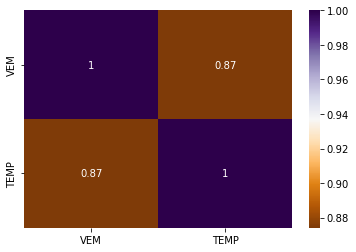

In [160]:
sb.heatmap(dataframe.corr(), annot=True, cmap="PuOr")

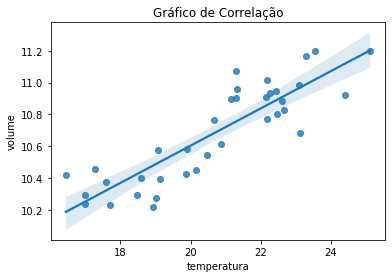

In [188]:
fig = sb.regplot (data=dataframe, x="TEMP", y="VEM")
plt.title('Gráfico de Correlação')
plt.xlabel('temperatura')
plt.ylabel('volume')
plt.show()

In [224]:
# Utilizando a classe LinearRegression do pacote linear_model
from sklearn.linear_model import LinearRegression

# Importando o método train_test_split para separar os dados entre treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados em treino e teste
# Separando os dados transformados em X (determinado) e y (não determinado)
X = dataframe[['TEMP']]
y = dataframe['VEM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo com os conjuntos de treino
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

# Predição de volume com base no treino
y_pred = model.predict(X_test).round(2)
df = pd.DataFrame(y_pred)
print(df)

        0
0   10.88
1   10.84
2   10.89
3   10.25
4   10.49
5   10.31
6   10.58
7   10.90
8   10.74
9   10.42
10  10.75


In [230]:
#TESTE DE QUALIDADE DE AJUSTE PARA UM MODELO LINEAR

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred).round(2)
print(R2)

0.74
